In [302]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.cross_validation import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.learning_curve import learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.externals.six import StringIO

import pydot 

%matplotlib inline 
import matplotlib.pyplot as plt

In [47]:
df = pd.DataFrame.from_csv('datasets/stanford_heart_disease.csv')

In [48]:
df.columns = ['systolic_bp', 'tobacco_use', 'ldl_cholesterol', 'abdominal_adiposity', 'family_history', 'type_a', 'overall_obesity', 'alcohol_use','age','heart_disease'] 
df.index.names = ['rows']

In [49]:
df.family_history = pd.get_dummies(df.family_history).Present

In [228]:
df = sm.add_constant(df)
df.head()

,const,systolic_bp,tobacco_use,ldl_cholesterol,abdominal_adiposity,family_history,type_a,overall_obesity,alcohol_use,age,heart_disease
rows,,,,,,,,,,,
1,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,1,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,1,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,1,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [229]:
classifiers = df.drop('heart_disease', axis=1)
response = df.heart_disease
x_train, x_test, y_train, y_test = train_test_split(classifiers, response)

In [385]:
columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
estimators_df = pd.DataFrame(columns=[columns])

#Linear Regression

In [230]:
model = sm.OLS(y_train, x_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          heart_disease   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     11.02
Date:                Mon, 04 May 2015   Prob (F-statistic):           4.57e-15
Time:                        16:27:54   Log-Likelihood:                -187.96
No. Observations:                 346   AIC:                             395.9
Df Residuals:                     336   BIC:                             434.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                  -0.5170      0.241     -2.142      0.033        -0.992    -0.042
systolic_bp             0.0010      0.001      0.806      0.421        -0.001     0.004
tobacco_use             0.0151      0.006      2.585      0.010         0.004     0.027
ldl_cholesterol         0.0338      0.014      2.415      0.016         0.006     0.061
abdominal_adiposity     0.0019      0.006      0.317      0.751        -0.010     0.013
family_history          0.1558      0.048      3.238      0.001         0.061     0.250
type_a                  0.0072      0.002      3.078      0.002         0.003     0.012
overall_obesity        -0.0111      0.009     -1.248      0.213        -0.028     0.006
alcohol_use            -0.0002      0.001     -0.224      0.823        -0.002     0.002
age                     0.0072      0.002      3.101      0.002         0.003     0.012
==============================================================================
Omnibus:                       61.391   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.381
Skew:                           0.425   Prob(JB):                     8.37e-06
Kurtosis:                       2.051   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

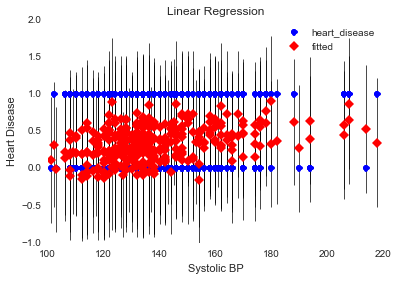

In [253]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 1, ax=ax)
ax.set_ylabel("Heart Disease")
ax.set_xlabel("Systolic BP")
ax.set_title("Linear Regression")

#K-Nearest Neighbor

In [354]:
k_scores = {}
for i in range(1,50):   
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, neigh.predict(x_test))
    precision = precision_score(y_test, neigh.predict(x_test), pos_label=1)
    recall = recall_score(y_test, neigh.predict(x_test), pos_label=1)
    f1 = f1_score(y_test, neigh.predict(x_test), pos_label=1)
    k_scores[i] = {'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1':f1}

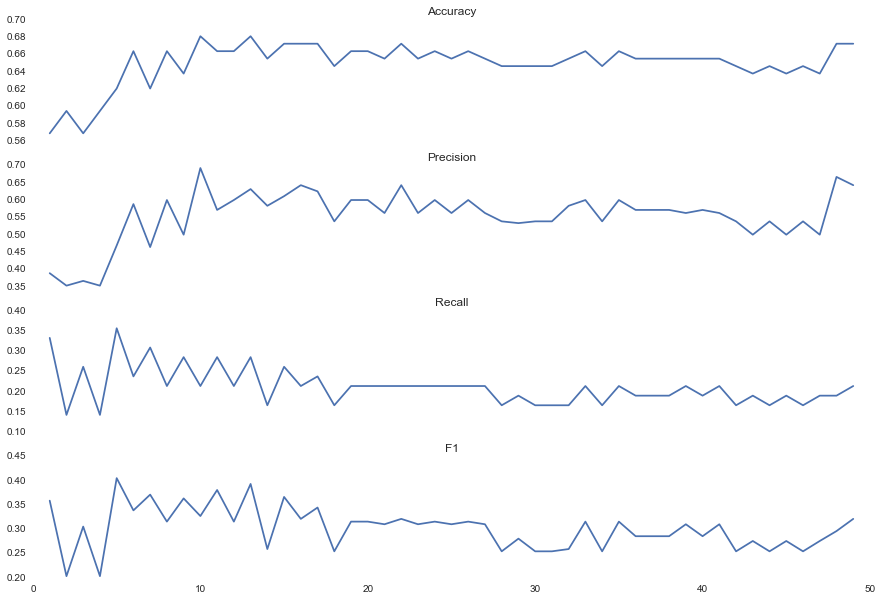

In [355]:
# 'Accuracy' plots for varying number of neighbors
f, axarr = plt.subplots(4, sharex=True, figsize=(15,10),)
axarr[0].plot(k_scores.keys(), [i['Accuracy'] for i in k_scores.values()])
axarr[0].set_title('Accuracy')
axarr[1].plot(k_scores.keys(), [i['Precision'] for i in k_scores.values()])
axarr[1].set_title('Precision')
axarr[2].plot(k_scores.keys(), [i['Recall'] for i in k_scores.values()])
axarr[2].set_title('Recall')
axarr[3].plot(k_scores.keys(), [i['F1'] for i in k_scores.values()])
axarr[3].set_title('F1')
f.subplots_adjust(hspace=.2)

KNN AUC is 0.731821106821


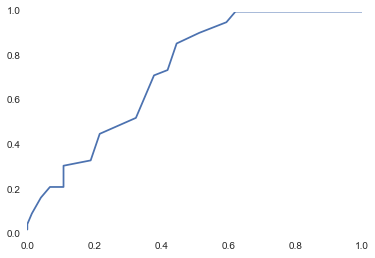

In [402]:
probabilities = neigh.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("KNN AUC is {0}".format(roc_auc))

In [357]:
max_dict = {}
for score in ['Accuracy','Precision','Recall','F1']:
    max_dict[score] = max([(v[score],k) for k,v in k_scores.items()])

In [358]:
print("Max accuracy of {0} at {1} neighbors".format(*max_dict['Accuracy']))
print("Max precision of {0} at {1} neighbors".format(*max_dict['Precision']))
print("Max recall of {0} at {1} neighbors".format(*max_dict['Recall']))
print("Max F1 of {0} at {1} neighbors".format(*max_dict['F1']))

Max accuracy of 0.681034482759 at 13 neighbors
Max precision of 0.692307692308 at 10 neighbors
Max recall of 0.357142857143 at 5 neighbors
Max F1 of 0.405405405405 at 5 neighbors


In [407]:
estimators_df.loc['KNN'] = [max_dict.get(i,[0,0])[0] for i in columns]
estimators_df['AUC'].loc['KNN'] = roc_auc

/Users/amangum/Virtualenvs/metis/lib/python2.7/site-packages/pandas/core/indexing.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


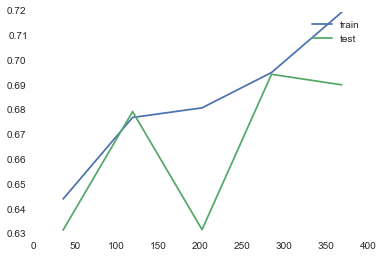

In [362]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=13), classifiers, response, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test')
plt.legend()

#Logistic Regression

In [311]:
from sklearn.cross_validation import cross_val_score
X=classifiers
y=response
print("Accuracy: "+str(np.mean(cross_val_score(LogisticRegression(), X, y, scoring='accuracy'))))
print("Precision: "+str(np.mean(cross_val_score(LogisticRegression(), X, y, scoring='precision'))))
print("Recall: "+str(np.mean(cross_val_score(LogisticRegression(), X, y, scoring='recall'))))
print("F1: "+str(np.mean(cross_val_score(LogisticRegression(), X, y, scoring='f1'))))

Accuracy: 0.718621198887
Precision: 0.625358851675
Recall: 0.474959235966
F1: 0.539368652113


In [413]:
model = LogisticRegression()
model.fit(x_train, y_train)
accuracy = accuracy_score(y_test, model.predict(x_test))
precision = precision_score(y_test, model.predict(x_test), pos_label=1)
recall = recall_score(y_test, model.predict(x_test), pos_label=1)
f1 = f1_score(y_test, model.predict(x_test), pos_label=1)

KNN AUC is 0.80148005148


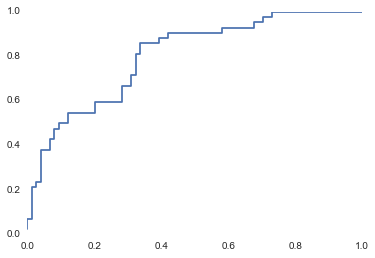

In [416]:
probabilities = model.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
print("KNN AUC is {0}".format(roc_auc))

In [397]:
estimators_df.loc['LogisticRegression'] = [accuracy,precision,recall,f1,roc_auc]

In [408]:
estimators_df

,Accuracy,Precision,Recall,F1,AUC
KNN,0.6810345,0.6923077,0.3571429,0.4054054,0.731821
LogisticRegression,0.7586207,0.71875,0.547619,0.6216216,0.198198


decision tree regression

try for single classifiers too. search for something that has been made to check multiple classifiers on multiple estimators. I will write a function for this

scale features for better knn, maybe

try out sklearn gridsearch to trying different combos of parameters

try out scatter plot matrix
sns.corrplot

make the automatic_statistician